In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
train_x, test_x, train_y, test_y= train_test_split(X, y, test_size = 20000, random_state = 42)

In [5]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(50000, 784) (20000, 784) (50000,) (20000,)


In [6]:
test_x, val_x, test_y, val_y = train_test_split(test_x, test_y,test_size = 10000, random_state = 42)

In [7]:
print(test_x.shape, val_x.shape, test_y.shape, val_y.shape)

(10000, 784) (10000, 784) (10000,) (10000,)


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
et_clf = ExtraTreesClassifier(n_estimators=100,max_depth=None,random_state=42,n_jobs=-1)

rnd_clf = RandomForestClassifier(n_estimators=10,verbose=1)
svm_clf = LinearSVC(max_iter=100,random_state=42,verbose=True)

'scaler = StandardScaler()\ntrain_x_scaled = scaler.fit_transform(train_x)\nval_x_scaled   = scaler.transform(val_x)\ntest_x_scaled  = scaler.transform(test_x)'

In [11]:
voting_clf = VotingClassifier(estimators=[('et',et_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard')


'voting_clf.fit(train_x_scaled, train_y)'

In [13]:
for clf in (et_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    print(clf.__class__.__name__, accuracy_score(test_y,y_pred))

ExtraTreesClassifier 0.9689
RandomForestClassifier 0.9445
[LibLinear]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC 0.9107
[LibLinear]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingClassifier 0.9602


'val_pred = voting_clf.predict(val_x_scaled)\nval_acc = accuracy_score(val_y, val_pred)\nprint("Voting Classifier (Validation) Accuracy:", val_acc)'

In [15]:
#9

In [16]:
import numpy as np

In [17]:
array_col = []


In [18]:
for clf in (et_clf, rnd_clf, svm_clf):
    clf.fit(train_x, train_y)
    y_pred = clf.predict(test_x)
    print(y_pred.shape)

(10000,)
(10000,)
[LibLinear](10000,)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [19]:
et_clf.fit(train_x, train_y)
y_pred_et = et_clf.predict(test_x)

In [20]:
rnd_clf.fit(train_x, train_y)
y_pred_rnd = rnd_clf.predict(test_x)

In [21]:
svm_clf.fit(train_x, train_y)
y_pred_svm = svm_clf.predict(test_x)

[LibLinear]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
test_x.shape



(10000, 784)

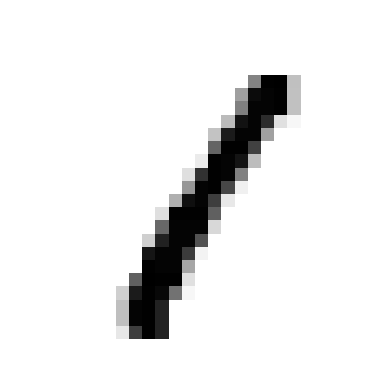

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


some_digit = X[3]

# reshape() 함수를 이용하여 28x28 모양의 2차원 어레이로 변환
some_digit_image = some_digit.reshape(28, 28)

# 흑백 이미지로 보여주기
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

In [26]:
y_pred_et = y_pred_et.reshape(-1, 1)
y_pred_rnd = y_pred_rnd.reshape(-1, 1)

# 이제 2차원 배열을 axis=1로 병합
x_train_temp = np.concatenate((y_pred_et, y_pred_rnd), axis=1)

In [27]:
y_pred_svm = y_pred_svm.reshape(-1, 1)


x_train_new = np.concatenate((x_train_temp, y_pred_svm), axis=1)

In [28]:
x_train_new.shape

(10000, 3)

(10000, 784)

In [43]:
rnd_clf.fit(x_train_new,test_y)
y_pred = rnd_clf.predict(x_train_new)
print(clf.__class__.__name__, accuracy_score(test_y,y_pred))

LinearSVC 0.9744


In [ ]:
from google.colab import drive
drive.mount('/content/drive')